## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit
from pyccel.epyccel import epyccel

## Pure python function

In [2]:
def solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx):

    #fill the update of u
    for n in range(nt):  
        for i in range(nx): un[i] = u[i]
        for i in range(1, nx): 
            u[i] = un[i] - un[i] * (dt / dx) * (un[i] - un[i-1])
    return 0

## Numba accelerator

In [3]:
@njit(fastmath=True)
def solve_1d_nonlinearconv_numba(u, un, nt, nx, dt, dx):

    #fill the update of u
    for n in range(nt):  
        for i in range(nx): un[i] = u[i]
        for i in range(1, nx): 
            u[i] = un[i] - un[i] * (dt / dx) * (un[i] - un[i-1])
    return 0

## Pyccel accelerator

In [4]:
def solve_1d_nonlinearconv_pyccel(u:'float[:]', un:'float[:]', nt:'int', nx:'int', dt:'float', dx:'float'):

    #fill the update of u
    for n in range(nt):  
        for i in range(nx): un[i] = u[i]
        for i in range(1, nx): 
            u[i] = un[i] - un[i] * (dt / dx) * (un[i] - un[i-1])
    return 0

## Inputs

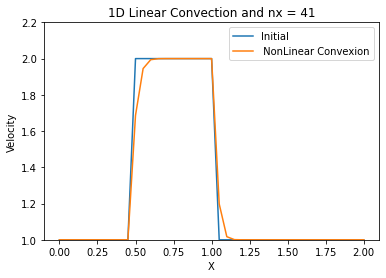

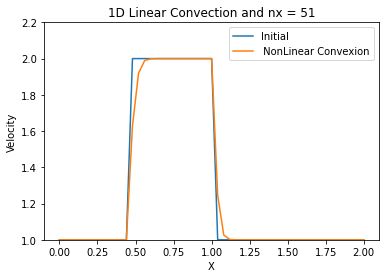

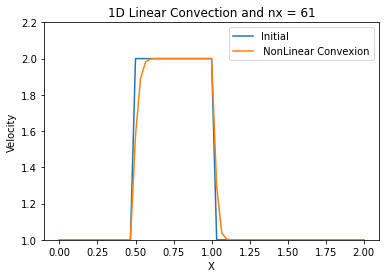

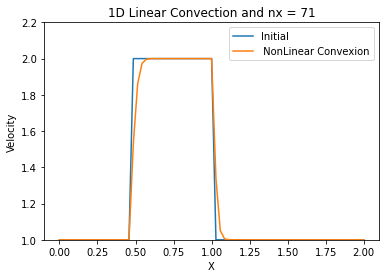

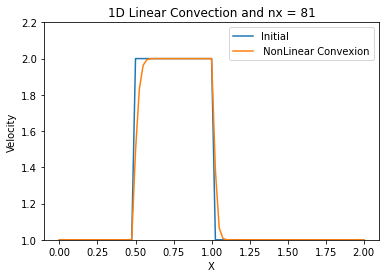

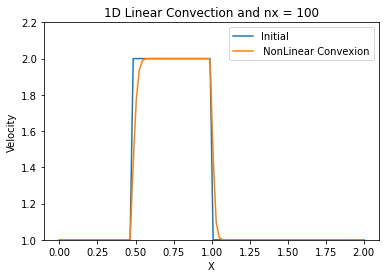

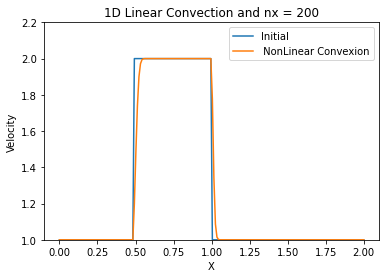

In [14]:
N = [41, 51, 61, 71, 81, 100, 200]
for nx in N:
    dx = 2 / (nx-1)
    nt = 10    #nt is the number of timesteps we want to calculate
    dt = 0.001
    grid = np.linspace(0,2,nx) # creating the space grid    

    u0 = np.ones(nx)      #numpy function ones()
    u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
    plt.plot(grid,u0, label="Initial")
    u = u0.copy()
    un = np.ones(nx)

    solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx)
    #Plotting data
    plt.plot(grid,u, label=" NonLinear Convexion");
    plt.ylim([1.,2.2])
    plt.xlabel('X')
    plt.ylabel('Velocity')    
    plt.title('1D Linear Convection and nx = {}'.format(nx))
    plt.legend()
    plt.show()

## Call Funtions

### Pure function

In [6]:
%timeit solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx)

513 µs ± 8.76 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Function with numba accelerator

In [7]:
%timeit solve_1d_nonlinearconv_numba(u, un, nt, nx, dt, dx)

The slowest run took 7.43 times longer than the fastest. This could mean that an intermediate result is being cached.
2.57 µs ± 2.87 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [10]:
solve_1d_nonlinearconv_f90 = epyccel(solve_1d_nonlinearconv_pyccel)

In [11]:
%timeit solve_1d_nonlinearconv_f90(u, un, nt, nx, dt, dx)

912 ns ± 61.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


**<center>Thank you !</center>**